<a href="https://colab.research.google.com/github/Sadanan643021272-0/BSC_DPDM23/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# mounting colab with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
shopping_data = pd.read_csv('/content/drive/MyDrive/BSC_DPDM23/customer_shopping_data.csv')
shopping_data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


# ข้อมูลบางส่วนมีค่าตัวแปรบางตัวที่ไม่ทราบค่า (Missing Data)

In [ ]:
shopping_data.isnull().any()

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price             False
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

## เราจะลบ Price ของ Records ที่เป็น Clothing, Cash, Metrocity ออก เพื่อจำลอง Missing data

In [ ]:
shopping_data[(shopping_data['category']=='Clothing')&
                      (shopping_data['payment_method']=='Cash')&
                      (shopping_data['shopping_mall']=='Metrocity')].describe()

,age,quantity,price
count,2284.000000,2284.000000,2284.000000
mean,43.657618,2.982049,894.853275
std,14.974270,1.408979,422.806539
min,18.000000,1.000000,300.080000
25%,30.750000,2.000000,600.160000
50%,44.000000,3.000000,900.240000
75%,57.000000,4.000000,1200.320000
max,69.000000,5.000000,1500.400000


In [ ]:
shopping_data[(shopping_data['category']=='Clothing') |
                      (shopping_data['payment_method']=='Cash') |
                      (shopping_data['shopping_mall']=='Metrocity')]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park
...,...,...,...,...,...,...,...,...,...,...
99450,I170504,C226974,Female,28,Books,1,15.15,Cash,28/02/2023,Zorlu Center
99451,I675411,C513603,Male,50,Toys,5,179.20,Cash,9/10/2021,Metropol AVM
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity


## ทำให้ price เป็น missing


In [ ]:
import numpy as np

In [ ]:
willbemissing = shopping_data[(shopping_data['category']=='Clothing')&
                      (shopping_data['payment_method']=='Cash')&
                      (shopping_data['shopping_mall']=='Metrocity')]

In [ ]:
willbemissing['price'] = np.nan    #แทนค่าทับลงไป

<ipython-input-9-ff7abf593032>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  willbemissing['price'] = np.nan    #แทนค่าทับลงไป


In [ ]:
willbemissing

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,NaN,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,NaN,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,NaN,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,NaN,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,NaN,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
98987,I693615,C323954,Female,33,Clothing,2,NaN,Cash,7/2/2021,Metrocity
99153,I922072,C336171,Male,47,Clothing,4,NaN,Cash,22/01/2021,Metrocity
99178,I135939,C211085,Male,40,Clothing,3,NaN,Cash,1/11/2022,Metrocity
99339,I287566,C216529,Female,48,Clothing,1,NaN,Cash,25/02/2023,Metrocity


## แยก data ส่วนที่ไม่ missing ออกมา

In [ ]:
nomissing = shopping_data[(shopping_data['category'] !='Clothing') |
                      (shopping_data['payment_method']!='Cash') |  #เตรื่องหมาย or
                      (shopping_data['shopping_mall']!='Metrocity')]

## จับมันกลับมารวมกัน

In [ ]:
new_shopping_data = pd.concat([willbemissing,nomissing])
new_shopping_data.shape   #จะกลับมาเป็นเหมือนเดิม

(99457, 10)

## Example

In [ ]:
new_shopping_data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,NaN,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,NaN,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,NaN,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,NaN,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,NaN,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [ ]:
new_shopping_data.isnull().any()

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price              True
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

## Fix

## 1 ignore (ลบออกไปเลย)

### Quiz
- data หายไปกี่ %
- mean data รวมกันหลังจากแก้ Missing เป็นเท่าไหร่

In [ ]:
new_shopping_data_drop = new_shopping_data.dropna()

In [ ]:
100*((len(new_shopping_data)-len(new_shopping_data_drop))/len(new_shopping_data))

2.2964698311833254

In [ ]:
new_shopping_data_drop.describe()

,age,quantity,price
count,97173.000000,97173.000000,97173.000000
mean,43.421671,3.003931,684.423873
std,14.990459,1.413123,949.438067
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,40.660000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


### 2.เติมด้วย unknow *เราจะเติมกับข้อมูล categorical

### 3.เติมด้วยค่าเฉลี่ย

In [ ]:
new_shopping_data_drop['price'].mean()

684.4238731952291

In [ ]:
mean_val = new_shopping_data_drop['price'].mean()

In [ ]:
new_shopping_data_fillmean = new_shopping_data.fillna({'price': mean_val})

In [ ]:
new_shopping_data_fillmean.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,684.423873
std,14.990054,1.413025,938.472859
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


####quiz
- mean ใหม่จะเป็นเท่าไหร่

In [ ]:
mean_val = new_shopping_data_drop['price'].mean()

In [ ]:
new_shopping_data_fillmean = new_shopping_data.fillna({'price':mean_val})

In [ ]:
new_shopping_data_fillmean.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,684.423873
std,14.990054,1.413025,938.472859
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


### 4.เติมด้วยค่าเฉลี่ยของกลุ่ม

quiz
- mean หลังเติมด้วยค่าเฉลี่ย Clothing
- mean หลังเติมด้วยค่าเฉลี่ย Cash
- mean หลังเติมด้วยค่าเฉลี่ย Metrocity
- mean หลังเติมด้วยค่าเฉลี่ย Cash + Megacity

In [ ]:
new_shopping_data[new_shopping_data['category']=='Clothing']['price'].mean()

901.5259373350307

In [ ]:
new_shopping_data_fillcloth = new_shopping_data.fillna(
      {'price':new_shopping_data[new_shopping_data['category']=='Clothing']['price'].mean()})
new_shopping_data_fillcloth.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.409557
std,14.990054,1.413025,939.036135
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [ ]:
new_shopping_data_fillcash = new_shopping_data.fillna(
      {'price':new_shopping_data[new_shopping_data['shopping_mall']=='Cash']['price'].mean()})
new_shopping_data_fillcash.describe()

,age,quantity,price
count,99457.000000,99457.000000,97173.000000
mean,43.427089,3.003429,684.423873
std,14.990054,1.413025,949.438067
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,40.660000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [ ]:
new_shopping_data_fillcash = new_shopping_data.fillna(
    {'price':new_shopping_data[new_shopping_data['payment_method']=='Cash']['price'].mean()})
new_shopping_data_fillcash.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,684.317022
std,14.990054,1.413025,938.473117
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [ ]:
new_shopping_data_fillmega = new_shopping_data.fillna(
    {'price':new_shopping_data[new_shopping_data['shopping_mall']=='Metrocity']['price'].mean()})
new_shopping_data_fillmega.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,683.513500
std,14.990054,1.413025,938.491645
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [ ]:
new_shopping_data_fillmegacash = new_shopping_data.fillna(
    {'price':new_shopping_data[(new_shopping_data['shopping_mall']=='Metrocity') &
                               (new_shopping_data['payment_method']=='Cash')]['price'].mean()})
new_shopping_data_fillmegacash.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,681.979032
std,14.990054,1.413025,938.608338
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


# ข้อมูลมีความซ้ำซ้อน (Duplicate Data)

In [ ]:
willbedup = shopping_data[(shopping_data['category']=='Clothing') &
              (shopping_data['payment_method']=='Cash') &
              (shopping_data['shopping_mall']=='Metrocity')]

In [ ]:
new_shopping_dup = pd.concat([shopping_data,willbedup])

In [ ]:
new_shopping_dup.shape

(101741, 10)

In [ ]:
new_shopping_dup

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
98987,I693615,C323954,Female,33,Clothing,2,600.16,Cash,7/2/2021,Metrocity
99153,I922072,C336171,Male,47,Clothing,4,1200.32,Cash,22/01/2021,Metrocity
99178,I135939,C211085,Male,40,Clothing,3,900.24,Cash,1/11/2022,Metrocity
99339,I287566,C216529,Female,48,Clothing,1,300.08,Cash,25/02/2023,Metrocity


In [ ]:
new_shopping_dup = new_shopping_dup.sort_values(by='invoice_date')

## Example

In [ ]:
new_shopping_dup.duplicated()

41431    False
13715    False
36955    False
67503    False
94539    False
         ...  
57595    False
48891    False
95968    False
54569    False
94163    False
Length: 101741, dtype: bool

In [ ]:
new_shopping_dup.duplicated().any()

True

In [ ]:
new_shopping_dup[new_shopping_dup.duplicated()]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
30645,I235671,C196703,Female,45,Clothing,2,600.16,Cash,1/1/2021,Metrocity
27812,I836951,C382440,Male,54,Clothing,3,900.24,Cash,1/1/2021,Metrocity
67018,I122424,C970402,Female,30,Clothing,1,300.08,Cash,1/1/2022,Metrocity
52134,I740632,C283467,Female,49,Clothing,5,1500.40,Cash,1/1/2022,Metrocity
32519,I341543,C754279,Female,53,Clothing,5,1500.40,Cash,1/1/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
82563,I301995,C734886,Female,67,Clothing,2,600.16,Cash,9/8/2022,Metrocity
63360,I180399,C286433,Female,31,Clothing,3,900.24,Cash,9/9/2021,Metrocity
90298,I422962,C183016,Female,55,Clothing,2,600.16,Cash,9/9/2021,Metrocity
97787,I275007,C259969,Male,61,Clothing,2,600.16,Cash,9/9/2022,Metrocity


## Fix

In [ ]:
new_shopping_dup.drop_duplicates()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
41431,I880831,C362018,Male,47,Books,2,30.30,Credit Card,1/1/2021,Emaar Square Mall
13715,I151379,C733582,Male,45,Clothing,1,300.08,Cash,1/1/2021,Metropol AVM
36955,I966320,C169558,Female,59,Clothing,3,900.24,Credit Card,1/1/2021,Mall of Istanbul
67503,I983410,C118410,Male,61,Toys,4,143.36,Credit Card,1/1/2021,Cevahir AVM
94539,I234686,C866358,Female,29,Cosmetics,2,81.32,Debit Card,1/1/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
57595,I682579,C505081,Female,67,Cosmetics,4,162.64,Credit Card,9/9/2022,Metrocity
48891,I208010,C261419,Female,23,Shoes,5,3000.85,Debit Card,9/9/2022,Kanyon
95968,I328329,C294627,Male,21,Clothing,1,300.08,Cash,9/9/2022,Metropol AVM
54569,I100441,C202089,Female,43,Cosmetics,3,121.98,Cash,9/9/2022,Istinye Park


In [ ]:
new_shopping_dup.drop_duplicates().duplicated().any()

False

# ข้อมูลบางตัวในชุดข้อมูลมีลักษณะผิดปกติหรือแตกต่างจากข้อมูลส่วนใหญ่ (Outlier)

In [ ]:
from matplotlib import pyplot as plt

## Example

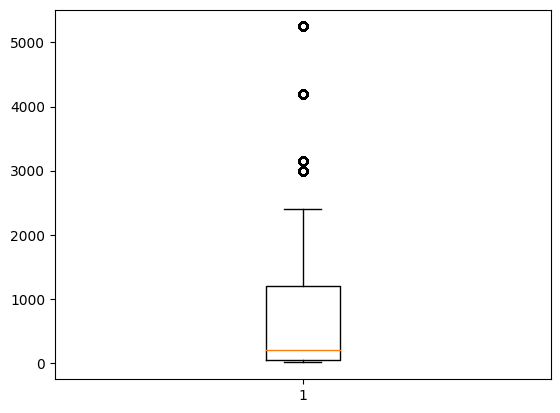

In [ ]:
plt.boxplot(shopping_data['price']);

## Fix

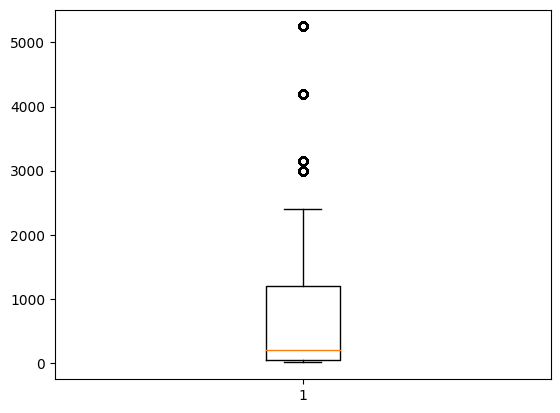

In [ ]:
ret = plt.boxplot(shopping_data['price'])

In [ ]:
ret

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe9342ad2a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe9342ad030>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe9342afd30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe9342acdf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe9342ae380>],
 'means': []}

In [ ]:
ret['whiskers'][0].get_ydata()

array([45.45,  5.23])

In [ ]:
ret['whiskers'][1].get_ydata()

array([1200.32, 2400.68])

In [ ]:
ret['whiskers'][1].get_ydata()[1]

2400.68

In [ ]:
shopping_data[shopping_data['price']<=ret['whiskers'][1].get_ydata()[1]]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
...,...,...,...,...,...,...,...,...,...,...
99451,I675411,C513603,Male,50,Toys,5,179.20,Cash,9/10/2021,Metropol AVM
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity


# ค่าตัวแปรบางตัวที่ไม่ถูกต้อง (Erroneous Data)

#### แก้ age เป็นตัวหนังสือ

In [ ]:
shopping_data

In [ ]:
shopping_data.sort_values(by='age')

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
69089,I907811,C167489,Male,18,Shoes,3,1800.51,Debit Card,12/9/2022,Kanyon
95060,I128262,C687788,Male,18,Toys,4,143.36,Cash,2/5/2021,Mall of Istanbul
78728,I280590,C142284,Female,18,Clothing,2,600.16,Debit Card,26/10/2022,Forum Istanbul
55784,I210628,C525437,Female,18,Books,2,30.30,Cash,30/09/2022,Forum Istanbul
2443,I115916,C338582,Male,18,Shoes,5,3000.85,Debit Card,23/08/2022,Istinye Park
...,...,...,...,...,...,...,...,...,...,...
66267,I433176,C202678,Male,69,Toys,5,179.20,Credit Card,27/03/2021,Istinye Park
66279,I213234,C176169,Female,69,Shoes,2,1200.34,Credit Card,7/10/2021,Viaport Outlet
85428,I117055,C208685,Female,69,Souvenir,2,23.46,Cash,15/09/2022,Metrocity
66133,I288825,C345511,Female,69,Clothing,1,300.08,Credit Card,23/07/2021,Mall of Istanbul


#### แก้ค่า age ของ invoice_no = [I280590	, I210628	] เป็น less than 18

In [ ]:
shopping_data[(shopping_data['invoice_no']=='I280590') | (shopping_data['invoice_no']=='I210628')]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
55784,I210628,C525437,Female,18,Books,2,30.30,Cash,30/09/2022,Forum Istanbul
78728,I280590,C142284,Female,18,Clothing,2,600.16,Debit Card,26/10/2022,Forum Istanbul


In [ ]:
shopping_data.loc[55784,'age'] = 'less than 18'
shopping_data.loc[78728,'age'] = 'less than 18'

In [ ]:
#shopping_data.iloc[55784,:]

invoice_no               I210628
customer_id              C525437
gender                    Female
age                           18
category                   Books
quantity                       2
price                       30.3
payment_method              Cash
invoice_date          30/09/2022
shopping_mall     Forum Istanbul
Name: 55784, dtype: object

In [ ]:
shopping_data[(shopping_data['invoice_no']=='I280590') | (shopping_data['invoice_no']=='I210628')]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
55784,I210628,C525437,Female,less than 18,Books,2,30.30,Cash,30/09/2022,Forum Istanbul
78728,I280590,C142284,Female,less than 18,Clothing,2,600.16,Debit Card,26/10/2022,Forum Istanbul


## Example

In [ ]:
shopping_data.describe()

,quantity,price
count,99457.000000,99457.000000
mean,3.003429,689.256321
std,1.413025,941.184567
min,1.000000,5.230000
25%,2.000000,45.450000
50%,3.000000,203.300000
75%,4.000000,1200.320000
max,5.000000,5250.000000


### สมมติว่า error ไม่มาทารถประมวลค่า less than ได้

### ทดลองประมวลผล column age

In [ ]:
shopping_data[shopping_data.eq('less than 18').any(1)]

<ipython-input-62-4744250e9fad>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  shopping_data[shopping_data.eq('less than 18').any(1)]


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
55784,I210628,C525437,Female,less than 18,Books,2,30.30,Cash,30/09/2022,Forum Istanbul
78728,I280590,C142284,Female,less than 18,Clothing,2,600.16,Debit Card,26/10/2022,Forum Istanbul


### แทนค่า ด้วยค่าที่เหมาะสม

In [ ]:
shopping_data['age'] = shopping_data['age'].replace('less than 18', 17)  #แทนค่าด้วยเลข 17

In [ ]:
shopping_data[(shopping_data['invoice_no']=='I280590') | (shopping_data['invoice_no']=='I210628')]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
55784,I210628,C525437,Female,17,Books,2,30.30,Cash,30/09/2022,Forum Istanbul
78728,I280590,C142284,Female,17,Clothing,2,600.16,Debit Card,26/10/2022,Forum Istanbul


### หาว่าค่าที่่ทำให้ error อยู่ที่ไหน

## Fix

# ข้อมูลมีค่าตัวแปรไม่สอดคล้องซึ่งกันและกัน (Inconsistent)

## Example

เกิดเมื่อรวมข้อมูลจากหลายแหล่งแล้วค่าใน 2 columns ที่ค่าไม่เป็นไปในทางเดียวกันเช่น columns อายุไม่ตรงกับ columns วันเกิดหลังจากคำนวณอายุแล้ว

## Fix

เลือกเก็บไว้เฉพาะ column ที่ถูก

# Data Integretion (การรวมข้อมูลจากหลายแหล่ง)

## 1. รวมแกน Y (เพิ่ม rows - เพิ่ม data)

In [ ]:
sep_df = pd.read_excel ('/content/drive/MyDrive/DataViz23Data/sep65.xlsx', header=8,skipfooter=26)
sep_df = sep_df.iloc[-2:,:15]
sep_df['เดือน-ปี'] = len(sep_df)*['sep-65']
sep_df

,รายการ,งบประมาณ,สำรองเงินมีหนี้,PO,เบิกจ่าย,ร้อยละ\nเบิกจ่าย,เป้า\nหมาย Q4,*/- เป้าหมาย,การใช้จ่าย (PO+เบิกจ่าย),ร้อยละ\nการใช้จ่าย,เป้า\nหมาย Q4.1,*/- เป้าหมาย.1,คงเหลือ\nหลังหักใช้จ่าย,ลำดับเบิกจ่าย,ลำดับ\nใช้จ่าย,เดือน-ปี
2,ประจำ,1.892013e+10,7.925745e+07,7.131600e+07,1.880196e+10,99.375405,98.0,1.375405,1.895253e+10,100.171242,100.0,0.171242,-3.239918e+07,NaN,NaN,sep-65
3,ลงทุน,9.605258e+09,2.683430e+08,1.119320e+09,8.201965e+09,85.390363,75.0,10.390363,9.589628e+09,99.837275,100.0,-0.162725,1.563013e+07,6.0,15.0,sep-65


In [ ]:
oct_df = pd.read_excel ('/content/drive/MyDrive/DataViz23Data/oct65.xlsx',header=9,skipfooter=27)
oct_df = oct_df.iloc[-2:,:15]
oct_df['เดือน-ปี'] = len(oct_df)*['oct-65']
oct_df

,รายการ,งบประมาณ,สำรองเงินมีหนี้,PO,เบิกจ่าย,ร้อยละ\nเบิกจ่าย,เป้า\nหมาย Q1,*/- เป้าหมาย,การใช้จ่าย (PO+เบิกจ่าย),ร้อยละ\nการใช้จ่าย,เป้า\nหมาย Q1.1,*/- เป้าหมาย.1,คงเหลือ\nหลังหักใช้จ่าย,ลำดับเบิกจ่าย,ลำดับ\nใช้จ่าย,เดือน-ปี
2,ประจำ,6822.811789,NaN,12.706842,3984.779058,58.403766,35.0,23.403766,3997.485900,58.590007,35.33,23.260007,2825.325889,NaN,NaN,oct-65
3,ลงทุน,6180.211723,NaN,457.295806,1291.209026,20.892634,19.0,1.892634,1748.504832,28.291989,28.96,-0.668011,4431.706890,4.0,6.0,oct-65


In [ ]:
sep_oct_df = pd.concat([sep_df,oct_df])
sep_oct_df

,รายการ,งบประมาณ,สำรองเงินมีหนี้,PO,เบิกจ่าย,ร้อยละ\nเบิกจ่าย,เป้า\nหมาย Q4,*/- เป้าหมาย,การใช้จ่าย (PO+เบิกจ่าย),ร้อยละ\nการใช้จ่าย,เป้า\nหมาย Q4.1,*/- เป้าหมาย.1,คงเหลือ\nหลังหักใช้จ่าย,ลำดับเบิกจ่าย,ลำดับ\nใช้จ่าย,เดือน-ปี,เป้า\nหมาย Q1,เป้า\nหมาย Q1.1
2,ประจำ,1.892013e+10,7.925745e+07,7.131600e+07,1.880196e+10,99.375405,98.0,1.375405,1.895253e+10,100.171242,100.0,0.171242,-3.239918e+07,NaN,NaN,sep-65,NaN,NaN
3,ลงทุน,9.605258e+09,2.683430e+08,1.119320e+09,8.201965e+09,85.390363,75.0,10.390363,9.589628e+09,99.837275,100.0,-0.162725,1.563013e+07,6.0,15.0,sep-65,NaN,NaN
2,ประจำ,6.822812e+03,NaN,1.270684e+01,3.984779e+03,58.403766,NaN,23.403766,3.997486e+03,58.590007,NaN,23.260007,2.825326e+03,NaN,NaN,oct-65,35.0,35.33
3,ลงทุน,6.180212e+03,NaN,4.572958e+02,1.291209e+03,20.892634,NaN,1.892634,1.748505e+03,28.291989,NaN,-0.668011,4.431707e+03,4.0,6.0,oct-65,19.0,28.96


## 2. รวมแกน X (เพิ่ม columns - เพิ่ม feature)

In [ ]:
unit_df = pd.read_csv ('/content/drive/MyDrive/DataViz23Data/สำเนาของ opendata_unittype-2.csv')
unit_df

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:30:02,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,1.0,NaN,NaN,NaN,NaN,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43369,9507,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,880000.0,...,1.0,NaN,NaN,NaN,NaN,2022-10-19 11:30:05,2022-10-19 11:17:08,baania,https://baania.com/th/project/บ้านคุรุสภา-นครร...,2023-06-11
43370,23721,unittype_15644,project_6109,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,45.0,140.0,2400000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:24:19,2020-10-14 23:03:19,baania,https://baania.com/th/project/บ้านเต็มสิริ-1-6...,2023-06-11
43371,31551,unittype_21385,project_8392,อาคารพาณิชย์สี่ชั้น type B,4,Commercial,อาคารพาณิชย์,34.0,192.0,13000000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:19:31,2020-10-14 00:38:09,baania,https://baania.com/th/project/พระเงิน-เพลส-839...,2023-06-11
43372,29837,unittype_26243,project_10566,ทาวน์โฮมสามชั้น,3,Townhome,ทาวน์โฮม,NaN,191.0,2600000.0,...,NaN,1.0,NaN,NaN,NaN,2020-12-04 10:47:10,2020-10-16 16:33:56,baania,https://baania.com/th/project/บ้านไทยวิลล่า-ศร...,2023-06-11


In [ ]:
project_df = pd.read_csv ('/content/drive/MyDrive/DataViz23Data/opendata_project-2.csv')
project_df

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
1,4268.0,project_15905,Liberty Park 2,ลิเบอร์ตี้ พาร์ค 2,2,Condo,คอนโด,6500000.0,developer_10510,NaN,...,0.0,0.0,1.0,1.0,2019-06-28 16:06:45,1998-12-31 07:00:00,2020-12-04 10:39:27,baania,https://baania.com/th/project/ลิเบอร์ตี้-พาร์ค...,2023-06-11
2,5849.0,62b2b082cb0d2c0014be01a6,Pleno Paholyothin-Saimai 2,พลีโน่ พหลโยธิน-สายไหม 2,3,Townhome,ทาวน์โฮม,2790000.0,developer_1760,"AP (THAILAND) PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-06-22 13:02:42,2024-01-01 07:00:00,2023-03-20 15:00:04,baania,https://baania.com/th/project/พลีโน่-พหลโยธิน-...,2023-06-11
3,21762.0,project_6010,Baan Thara Rin,บ้านธารารินทร์,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2017-04-19 14:41:10,NaN,2022-11-07 12:30:02,baania,https://baania.com/th/project/บ้านธารารินทร์-p...,2023-06-11
4,10751.0,project_11312,The Forest Hill,เดอะ ฟอเรสต์ ฮิลล์,1,Detached House,บ้าน,2450000.0,developer_7313,"Cholsiri Property Co., Ltd.",...,1.0,NaN,1.0,1.0,2017-10-30 14:10:50,2018-12-31 07:00:00,2022-08-15 16:00:05,baania,https://baania.com/th/project/เดอะ-ฟอเรสต์-ฮิล...,2023-06-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23862,17534.0,project_9330,Parinyada Wongwan Sathorn,ปริญญดา วงแหวนสาทร,1,Detached House,บ้าน,4780000.0,developer_1762,NaN,...,1.0,NaN,1.0,1.0,2017-08-22 16:58:38,2006-12-31 07:00:00,2020-12-04 10:46:24,baania,https://baania.com/th/project/ปริญญดา-วงแหวนสา...,2023-06-11
23863,12360.0,project_9316,Sinwong Garden,สินวงศ์การ์เด้น,20000,Twin house,บ้านแฝด,1280000.0,developer_10510,NaN,...,NaN,NaN,NaN,1.0,2017-08-22 15:19:06,NaN,2023-02-02 18:30:02,baania,https://baania.com/th/project/สินวงศ์การ์เด้น-...,2023-06-11
23864,6865.0,project_15993,La Maison Sukhumvit 22,ลาเมซอง สุขุมวิท 22,2,Condo,คอนโด,9350000.0,developer_10510,NaN,...,NaN,NaN,1.0,1.0,2019-07-02 15:34:11,1994-12-31 07:00:00,2021-07-05 12:00:14,baania,https://baania.com/th/project/ลาเมซอง-สุขุมวิท...,2023-06-11
23865,74.0,project_105,Regent 1,รีเจ้นท์ 1,1,Detached House,บ้าน,3100000.0,developer_100,"THE TROPICAL HOME CO., LTD.",...,NaN,NaN,1.0,1.0,2015-09-23 09:06:27,NaN,2020-12-04 10:44:04,baania,https://baania.com/th/project/รีเจ้นท์-1-proje...,2023-06-11


# Data Reduction

## Reduce number of data (Y- axis) - Sampling

In [ ]:
shopping_data.sample()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
78506,I166614,C159487,Female,31,Clothing,2,600.16,Cash,26/05/2021,Istinye Park


In [ ]:
shopping_data.sample(random_state = 6)  #กำหนดแรนดอมเพื่อให้ได้ผลลัพธ์ตรงกับคนอื่น

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
81034,I209459,C312307,Female,18,Souvenir,1,11.73,Cash,13/05/2021,Cevahir AVM


In [ ]:
shopping_data.sample(n=10, random_state = 6)  # อยากได้ data มา  10 ตัว

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
81034,I209459,C312307,Female,18,Souvenir,1,11.73,Cash,13/05/2021,Cevahir AVM
91838,I351059,C292856,Male,41,Clothing,2,600.16,Credit Card,9/7/2021,Metropol AVM
20458,I323617,C325754,Female,24,Clothing,2,600.16,Credit Card,1/2/2022,Istinye Park
73343,I104653,C209092,Male,62,Toys,5,179.20,Cash,19/11/2022,Cevahir AVM
70406,I804767,C196027,Female,65,Clothing,3,900.24,Credit Card,28/03/2022,Istinye Park
65247,I137393,C726791,Female,37,Food & Beverage,3,15.69,Credit Card,19/10/2022,Kanyon
49419,I650563,C283975,Male,28,Clothing,3,900.24,Debit Card,11/6/2021,Mall of Istanbul
90371,I109001,C901685,Female,36,Toys,3,107.52,Credit Card,15/09/2022,Istinye Park
98492,I394097,C307872,Male,29,Food & Beverage,1,5.23,Credit Card,10/11/2022,Cevahir AVM
11309,I163506,C223150,Male,34,Food & Beverage,1,5.23,Cash,17/10/2021,Kanyon


In [ ]:
shopping_data.sample(frac=0.2 , random_state = 6) #ดึงออกมาโดยใช้สัดส่วน 20%  dataก็จะลดจาก หลายๆหมื่น เป็น 19891 rows

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
81034,I209459,C312307,Female,18,Souvenir,1,11.73,Cash,13/05/2021,Cevahir AVM
91838,I351059,C292856,Male,41,Clothing,2,600.16,Credit Card,9/7/2021,Metropol AVM
20458,I323617,C325754,Female,24,Clothing,2,600.16,Credit Card,1/2/2022,Istinye Park
73343,I104653,C209092,Male,62,Toys,5,179.20,Cash,19/11/2022,Cevahir AVM
70406,I804767,C196027,Female,65,Clothing,3,900.24,Credit Card,28/03/2022,Istinye Park
...,...,...,...,...,...,...,...,...,...,...
75991,I189802,C338933,Female,63,Clothing,3,900.24,Credit Card,28/06/2021,Mall of Istanbul
85083,I121218,C125359,Male,42,Clothing,3,900.24,Debit Card,14/10/2021,Metrocity
55086,I365478,C904439,Female,62,Clothing,4,1200.32,Credit Card,19/01/2023,Viaport Outlet
1096,I145120,C293612,Female,60,Clothing,4,1200.32,Debit Card,4/2/2023,Metrocity


In [ ]:
sam_no_replace = shopping_data.sample(frac=0.2, random_state = 6)
sam_no_replace.duplicated().any()  # false คือ ไม่มี Dup

False

In [ ]:
sam_with_replace = shopping_data.sample(frac=0.2, replace = True ,random_state = 6)
sam_with_replace.duplicated().any()   #เพิ่ม data

True

In [ ]:
sam_with_replace_120 = shopping_data.sample(frac=1.2, replace = True, random_state=6)

In [ ]:
sam_with_replace_120.shape

(119348, 10)

## Reduce dimension of data (X-axis) - PCA & Stats

ดูใน PCA.inynb